In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/kaggle"

In [ ]:
pwd

'/content'

In [ ]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

 97% 25.0M/25.7M [00:00<00:00, 76.2MB/s]
100% 25.7M/25.7M [00:00<00:00, 125MB/s] 


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [ ]:
dataset=pd.read_csv('/content/IMDB Dataset.csv')
dataset.head()
d=dataset['review'].str.len().value_counts()
max(d)

96

In [ ]:
df = pd.read_csv('/content/IMDB Dataset.csv')
df.head(3)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive


In [ ]:

df = pd.read_csv("/content/IMDB Dataset.csv")
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
print("Summary statistics of numerical features : \n", df.describe())

print("=======================================================================")

print("\nTotal number of reviews: ",len(df))

print("=======================================================================")

print("\nTotal number of Sentiments: ", len(list(set(df['sentiment']))))

df['sentiment'] = np.where(df['sentiment'] == "positive", 1, 0)
df

Summary statistics of numerical features : 
                                                    review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000

Total number of reviews:  50000

Total number of Sentiments:  2


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [ ]:
df.shape

(50000, 2)

In [ ]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
# info of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


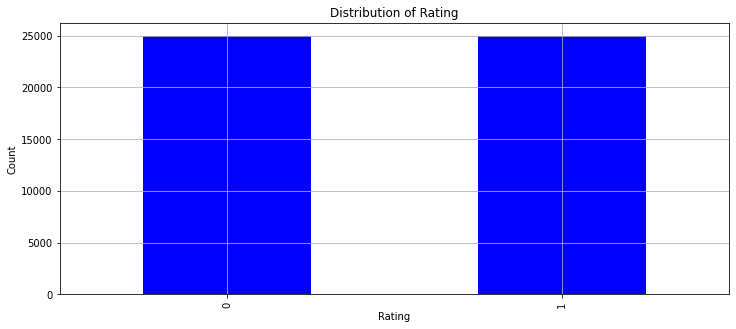

In [ ]:
plt.figure(figsize=(12,5))
# sns.countplot(df['Rating'])
df['sentiment'].value_counts().sort_index().plot(kind='bar',color = 'blue')
plt.title('Distribution of Rating')
plt.grid()
plt.xlabel('Rating')
plt.ylabel('Count')
ax = plt.axes()
ax.set_facecolor("white")

In [ ]:
df = df.sample(frac=0.1, random_state=0) #uncomment to use full set of data

# Drop missing values
df.dropna(inplace=True)

df


,review,sentiment
11841,John Cassavetes is on the run from the law. He...,1
19602,It's not just that the movie is lame. It's mor...,0
45519,"Well, if it weren't for Ethel Waters and a 7-y...",0
25747,I find Alan Jacobs review very accurate concer...,1
42642,This movie is simply awesome. It is so hilario...,1
...,...,...
9869,This is an excellent movie that tackles the is...,1
42192,i was kinda interested in this movie as a tras...,0
12143,I think I am some kind of Road Runner fan. I d...,1
34963,Two years passed and mostly everyone looks dif...,1


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], \
                                                    test_size=0.1, random_state=0)

print('Load %d training examples and %d validation examples. \n' %(X_train.shape[0],X_test.shape[0]))
print('Show a review in the training set : \n', X_train.iloc[10])
X_train,y_train

Load 4500 training examples and 500 validation examples. 

Show a review in the training set : 
 THE CRIMSON RIVERS is one of the most over-directed, over-the-top, over-everything mess I've ever seen come out of France. There's nothing worse than a French production trying to out-do films made in Hollywood and CR is a perfect example of such a wannabe horror/action/buddy flick. I almost stopped it halfway through because I knew it wouldn't amount to anything but French guys trying to show-off.<br /><br />The film starts off promisingly, like some sort of expansive horror film, but it quickly shifts genres, from horror to action to x-files type to buddy flick, that in the end, CR is all of it and also none of it. It's so full of clichés that at one point I thought the whole thing was a comedy. The painful dialogue and those silent pauses, with fades outs and fades ins just at the right expositionary moments, made me groan. I thought only films made in Hollywood used this hackneyed techn

(23499    Paul Naschy as a ghostly security guard in thi...
 32754    For every series that makes it to television, ...
 41199    I had the displeasure of watching this movie w...
 4152     Hear are some of the interesting things our co...
 36723    Every time I think about this film I feel phys...
                                ...                        
 33530    I can not believe such slanted, jingoistic mat...
 16729    This movie was rented by a friend. Her choice ...
 33642    A British teen movies which centres around a g...
 10195    I only gave this film a 4 because I saw it in ...
 7520     What a disappointment!<br /><br />This film se...
 Name: review, Length: 4500, dtype: object, 23499    1
 32754    0
 41199    0
 4152     0
 36723    0
         ..
 33530    0
 16729    0
 33642    0
 10195    0
 7520     0
 Name: sentiment, Length: 4500, dtype: int64)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False, \
             ):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'html.parser').get_text()
    letters_only = re.sub("[^a-zA-Z]", " ", text)
    words = letters_only.lower().split() 
    
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming==True:

        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:
        return (words)
    
    return( " ".join(words))

In [ ]:
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag
from bs4 import BeautifulSoup 
import logging
from wordcloud import WordCloud
from gensim.models import word2vec
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors

X_train_cleaned = []
X_test_cleaned = []

for d in X_train:
    X_train_cleaned.append(cleanText(d))
print('Show a cleaned review in the training set : \n',  X_train_cleaned[10])
    
for d in X_test:
    X_test_cleaned.append(cleanText(d))

Show a cleaned review in the training set : 
 the crimson rivers is one of the most over directed over the top over everything mess i ve ever seen come out of france there s nothing worse than a french production trying to out do films made in hollywood and cr is a perfect example of such a wannabe horror action buddy flick i almost stopped it halfway through because i knew it wouldn t amount to anything but french guys trying to show off the film starts off promisingly like some sort of expansive horror film but it quickly shifts genres from horror to action to x files type to buddy flick that in the end cr is all of it and also none of it it s so full of clich s that at one point i thought the whole thing was a comedy the painful dialogue and those silent pauses with fades outs and fades ins just at the right expositionary moments made me groan i thought only films made in hollywood used this hackneyed technique the chase scene with vincent cassel running after the killer is so over 

In [ ]:
X_train=X_train_cleaned[:7000]
X_test=X_test_cleaned[:7000]
y_train=y_train[:7000]
y_test=y_test[:7000]

In [ ]:
len(X_train)

4500

In [ ]:
import requests
import re 
import shutil

url1 = 'https://docs.google.com/uc?export=download&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM'
resp = requests.get(url1)
code = re.findall('.*confirm=([0-9A-Za-z_]+).*', str(resp.content))
url2 = "https://docs.google.com/uc?export=download&confirm=%s&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM" % code[0]
with requests.get(url2, stream=True, cookies=resp.cookies) as r:
    with open('GoogleNews-vectors-negative300.bin.gz', 'wb') as f:
        shutil.copyfileobj(r.raw, f)

In [ ]:
BASE_DIR = ''
MAX_SEQUENCE_LENGTH = 100
MAX_NUM_WORDS = 20000
EMBEDDING_DIM = 300

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from gensim.models.fasttext import FastText
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.layers import Dense, Input, GlobalMaxPooling1D , Dropout
from keras.models import Model

from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix

In [ ]:
# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
#sequences = tokenizer.texts_to_sequences(texts)

In [ ]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
word_index.items()

Found 36777 unique tokens.


dict_items([('the', 1), ('and', 2), ('a', 3), ('of', 4), ('to', 5), ('is', 6), ('it', 7), ('in', 8), ('i', 9), ('this', 10), ('that', 11), ('s', 12), ('was', 13), ('for', 14), ('as', 15), ('movie', 16), ('with', 17), ('but', 18), ('film', 19), ('you', 20), ('t', 21), ('on', 22), ('he', 23), ('not', 24), ('are', 25), ('his', 26), ('have', 27), ('be', 28), ('one', 29), ('all', 30), ('at', 31), ('they', 32), ('by', 33), ('an', 34), ('who', 35), ('so', 36), ('from', 37), ('like', 38), ('there', 39), ('just', 40), ('or', 41), ('her', 42), ('out', 43), ('about', 44), ('if', 45), ('has', 46), ('what', 47), ('some', 48), ('good', 49), ('when', 50), ('can', 51), ('more', 52), ('she', 53), ('very', 54), ('up', 55), ('time', 56), ('no', 57), ('would', 58), ('my', 59), ('even', 60), ('which', 61), ('really', 62), ('only', 63), ('their', 64), ('story', 65), ('see', 66), ('were', 67), ('had', 68), ('we', 69), ('well', 70), ('me', 71), ('much', 72), ('will', 73), ('than', 74), ('do', 75), ('how', 76)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1



X_train = pad_sequences(X_train,maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(X_test,maxlen=MAX_SEQUENCE_LENGTH)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4500, 100)
(4500,)
(500, 100)
(500,)


In [ ]:
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors


In [ ]:
f="/content/GoogleNews-vectors-negative300.bin.gz"

In [ ]:
word2vec = KeyedVectors.load_word2vec_format(f, binary=True)
word2vec.wv.get_vector("test")

array([-1.42578125e-01, -3.68652344e-02,  1.35742188e-01, -6.20117188e-02,
        7.95898438e-02,  1.90429688e-02, -8.15429688e-02, -1.27929688e-01,
       -2.95410156e-02,  2.36328125e-01, -1.21582031e-01, -2.14843750e-01,
        1.29882812e-01, -2.70996094e-02, -5.20019531e-02,  2.15820312e-01,
       -1.81640625e-01,  5.10253906e-02, -1.60156250e-01, -1.76757812e-01,
        1.83105469e-02, -4.12597656e-02, -2.32421875e-01, -1.03149414e-02,
        1.45507812e-01,  5.24902344e-02, -3.96484375e-01, -1.92871094e-02,
        2.51770020e-03, -1.26953125e-02, -4.39453125e-02,  3.07617188e-02,
        9.57031250e-02, -1.75781250e-01,  1.04370117e-02,  1.89453125e-01,
       -2.36328125e-01,  4.37011719e-02,  2.81250000e-01, -2.07519531e-02,
       -1.81640625e-01, -2.17773438e-01,  2.33398438e-01,  5.29785156e-02,
       -1.13769531e-01,  9.39941406e-03, -1.49414062e-01,  1.99218750e-01,
       -1.75781250e-01,  3.16406250e-01,  8.10546875e-02, -6.12792969e-02,
       -1.52343750e-01, -

In [ ]:
print('Preparing embedding matrix.')
EMBEDDING_DIM=300
words_not_found = []
num_words = min(MAX_NUM_WORDS,vocab_size)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():

    if i >= MAX_NUM_WORDS:
        continue
    try:
        embedding_vector = word2vec[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)

    #embedding_vector = word2vec.wv.get_vector(word)
    


Preparing embedding matrix.


In [ ]:
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [ ]:
%%time
#A max pooling layer is often used after a CNN layer in order to reduce the complexity of the output
from keras.layers import Dense, Input, GlobalMaxPooling1D,Dropout

print('Training model.')

# train a 1D convnet with global maxpooling

sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(128, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(5)(x)
x = Dense(128, activation='relu')(x)
x= Dropout(0.5)(x)
preds = Dense(1, activation='sigmoid')(x)
model = Model(sequence_input, preds)
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['acc'])

Training model.
CPU times: user 79.4 ms, sys: 5.99 ms, total: 85.4 ms
Wall time: 117 ms


In [ ]:
history_3 =model.fit(X_train, y_train,
          batch_size=256,
          shuffle=True,
          epochs=10,
          validation_data=(X_test,y_test))

Epoch 1/10
18/18 [==============================] - 33s 61ms/step - loss: 0.6876 - acc: 0.5496 - val_loss: 0.6714 - val_acc: 0.5920
Epoch 2/10
18/18 [==============================] - 1s 32ms/step - loss: 0.6620 - acc: 0.6015 - val_loss: 0.6509 - val_acc: 0.6145
Epoch 3/10
18/18 [==============================] - 1s 32ms/step - loss: 0.6521 - acc: 0.6155 - val_loss: 0.6583 - val_acc: 0.5933
Epoch 4/10
18/18 [==============================] - 1s 31ms/step - loss: 0.6369 - acc: 0.6356 - val_loss: 0.6408 - val_acc: 0.6271
Epoch 5/10
18/18 [==============================] - 1s 33ms/step - loss: 0.6302 - acc: 0.6409 - val_loss: 0.6388 - val_acc: 0.6275
Epoch 6/10
18/18 [==============================] - 1s 32ms/step - loss: 0.6247 - acc: 0.6464 - val_loss: 0.6372 - val_acc: 0.6291
Epoch 7/10
18/18 [==============================] - 1s 31ms/step - loss: 0.6271 - acc: 0.6453 - val_loss: 0.6379 - val_acc: 0.6322
Epoch 8/10
18/18 [==============================] - 1s 32ms/step - loss: 0.6147 - 

In [ ]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
model = Sequential()
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
h=LSTM(100, dropout=0.2, recurrent_dropout=0.2)(embedded_sequences)
preds=Dense(1, activation='sigmoid')(h)
model = Model(sequence_input, preds)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 100, 300)          6000000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 6,160,501
Trainable params: 160,501
Non-trainable params: 6,000,000
_________________________________________________________________
None


In [ ]:
history_3 =model.fit(X_train, y_train,
          batch_size=256,
          shuffle=True,
          epochs=10,
          validation_data=(X_test,y_test))

Epoch 1/10
18/18 [==============================] - 21s 953ms/step - loss: 0.6749 - accuracy: 0.5616 - val_loss: 0.6359 - val_accuracy: 0.6400
Epoch 2/10
18/18 [==============================] - 17s 923ms/step - loss: 0.5607 - accuracy: 0.7167 - val_loss: 0.4991 - val_accuracy: 0.7500
Epoch 3/10
18/18 [==============================] - 17s 923ms/step - loss: 0.4805 - accuracy: 0.7691 - val_loss: 0.4913 - val_accuracy: 0.7740
Epoch 4/10
18/18 [==============================] - 16s 906ms/step - loss: 0.4605 - accuracy: 0.7862 - val_loss: 0.4344 - val_accuracy: 0.7960
Epoch 5/10
18/18 [==============================] - 16s 905ms/step - loss: 0.4358 - accuracy: 0.8011 - val_loss: 0.4311 - val_accuracy: 0.7920
Epoch 6/10
18/18 [==============================] - 16s 910ms/step - loss: 0.4337 - accuracy: 0.7973 - val_loss: 0.4779 - val_accuracy: 0.7940
Epoch 7/10
18/18 [==============================] - 16s 905ms/step - loss: 0.4416 - accuracy: 0.8004 - val_loss: 0.4393 - val_accuracy: 0.7840

In [ ]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
model = Sequential()
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(128, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(5)(x)
x=LSTM(100, dropout=0.2, recurrent_dropout=0.2)(x)
preds=Dense(1, activation='sigmoid')(x)
model = Model(sequence_input, preds)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 100, 300)          6000000   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 96, 128)           192128    
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 19, 128)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 6,283,829
Trainable params: 283,829
Non-trainable params: 6,000,000
___________________________________________

In [ ]:
history_3 =model.fit(X_train, y_train,
          batch_size=256,
          shuffle=True,
          epochs=10,
          validation_data=(X_test,y_test))

Epoch 1/10
18/18 [==============================] - 10s 277ms/step - loss: 0.6923 - accuracy: 0.5502 - val_loss: 0.6745 - val_accuracy: 0.5720
Epoch 2/10
18/18 [==============================] - 5s 262ms/step - loss: 0.6437 - accuracy: 0.6407 - val_loss: 0.6158 - val_accuracy: 0.6800
Epoch 3/10
18/18 [==============================] - 5s 254ms/step - loss: 0.5386 - accuracy: 0.7280 - val_loss: 0.5673 - val_accuracy: 0.7040
Epoch 4/10
18/18 [==============================] - 5s 253ms/step - loss: 0.4549 - accuracy: 0.7853 - val_loss: 0.5083 - val_accuracy: 0.7560
Epoch 5/10
18/18 [==============================] - 4s 244ms/step - loss: 0.4112 - accuracy: 0.8129 - val_loss: 0.4581 - val_accuracy: 0.7840
Epoch 6/10
18/18 [==============================] - 5s 253ms/step - loss: 0.3563 - accuracy: 0.8449 - val_loss: 0.4508 - val_accuracy: 0.7800
Epoch 7/10
18/18 [==============================] - 4s 246ms/step - loss: 0.3235 - accuracy: 0.8627 - val_loss: 0.4874 - val_accuracy: 0.7940
Epoch

In [ ]:
# join the rows as a string with '/n' as delimiter
all_text=' /n '.join(X_train_cleaned)

test_all_text=' /n '.join(X_test_cleaned)

In [ ]:
all_text[:100]

'paul naschy as a ghostly security guard in this is scarier than most of his fur and shoe polish were'

In [ ]:
# split each reviews of the training dataset and join them as a string
reviews = all_text.split(' /n ')
all_text = ' '.join(reviews)

# split each word of the training dataset in the string to a list
words = all_text.split()

In [ ]:
# split each reviews of the training dataset and join them as a string
test_reviews = test_all_text.split(' /n ')
test_all_text = ' '.join(test_reviews)

# split each word of the training dataset in the string to a list
test_words = test_all_text.split()

In [ ]:
words[:10]

['paul',
 'naschy',
 'as',
 'a',
 'ghostly',
 'security',
 'guard',
 'in',
 'this',
 'is']

In [ ]:
test_words[:10]

['it',
 's',
 'amazing',
 'that',
 'from',
 'a',
 'good',
 'though',
 'not',
 'wonderful']

In [ ]:
# print no of rows for train and test 
print("Train reviews: {}".format(len(reviews)))
print("Test reviews: {}".format(len(test_reviews)))

Train reviews: 4500
Test reviews: 500


In [ ]:
len(y_test)

500

In [ ]:
import gensim
model = gensim.models.Word2Vec.load_word2vec_format('path-to-vectors.txt', binary=False)

DeprecationWarning: ignored

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
countVect = CountVectorizer() 
X_train_countVect = countVect.fit_transform(X_train_cleaned)
print("Number of features : %d \n" %len(countVect.get_feature_names())) #6378 
print("Show some feature names : \n", countVect.get_feature_names()[::1000])


# Train MultinomialNB classifier
mnb = MultinomialNB()
mnb.fit(X_train_countVect, y_train)

Number of features : 11095 

Show some feature names : 
 ['aamir', 'bjm', 'confront', 'dukes', 'gathering', 'inspector', 'marrying', 'pack', 'reflects', 'skyrocket', 'tilting', 'write']


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
pickle.dump(countVect,open('countVect_imdb.pkl','wb'))

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score
def modelEvaluation(predictions):
    '''
    Print model evaluation to predicted result 
    '''
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions)))
    print("\nClassification report : \n", metrics.classification_report(y_test, predictions))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))

In [ ]:
import pickle

In [ ]:
predictions = mnb.predict(countVect.transform(X_test_cleaned))
modelEvaluation(predictions)


Accuracy on validation set: 0.8600

AUC score : 0.8555

Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.86      0.82      0.84        22

    accuracy                           0.86        50
   macro avg       0.86      0.86      0.86        50
weighted avg       0.86      0.86      0.86        50


Confusion Matrix : 
 [[25  3]
 [ 4 18]]


In [ ]:
import pickle
pickle.dump(mnb,open('Naive_Bayes_model_imdb.pkl','wb'))

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ezyzip (1).zip to ezyzip (1).zip


In [ ]:
import zipfile
from zipfile import ZipFile

file_name = '/content/templetes.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Extracted Successfully')

Extracted Successfully


In [ ]:
import flask
from flask import Flask, render_template, request
import pickle
import numpy as np
from flask_ngrok import run_with_ngrok
import warnings
warnings.filterwarnings('ignore')

app = Flask(__name__)
run_with_ngrok(app)

mnb = pickle.load(open('Naive_Bayes_model_imdb.pkl','rb'))
countVect = pickle.load(open('countVect_imdb.pkl','rb'))

@app.route('/', methods=['GET'])
def home():
  return render_template('home.html')
@app.route('/', methods=['GET', "POST"])
def predict():
  if request.method == 'POST':
        Reviews = request.form['Reviews']
        print(Reviews)
        data = [Reviews]
        print(data)
        vect = countVect.transform(data).toarray()
        print(vect)
        my_prediction = mnb.predict(vect)
        print(my_prediction)
        return render_template('result.html',prediction = my_prediction)

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://1eb9ce91a368.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


In [ ]:
import contractions

In [ ]:
import flask
from flask import Flask, render_template, request
import pickle
import numpy as np
from flask_ngrok import run_with_ngrok
import warnings
warnings.filterwarnings('ignore')

app = Flask(__name__)
run_with_ngrok(app)

mnb = pickle.load(open('Naive_Bayes_model_imdb.pkl','rb'))
countVect = pickle.load(open('countVect_imdb.pkl','rb'))

def classify(document):
    label = {0: 'negative', 1: 'positive'}
    X = countVect.transform([document])
    y = mnb.predict(X)[0]
    proba = np.max(mnb.predict_proba(X))
    return label[y], proba

   
    
@app.route('/', methods=['GET'])
def home():
  return render_template('home.html')

@app.route('/', methods=['GET', "POST"])
def predict():
  if request.method == 'POST':
        Reviews = request.form['Reviews']
        print(Reviews)
        y, proba = classify(Reviews)
        print(y)
        print(proba)
       # data = [Reviews]
       # print(data)
       # vect = countVect.transform(data).toarray()
        #print(vect)
        #my_prediction = mnb.predict(vect)
        return render_template('result.html',prediction=y,probability=round(proba*100, 2))



        

app.run()



 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://0cbaabcf41e1.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [07/Jul/2021 09:44:29] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Jul/2021 09:44:29] "GET /static/css/styles.css HTTP/1.1" 404 -
127.0.0.1 - - [07/Jul/2021 09:44:30] "GET /cover.gif HTTP/1.1" 404 -
127.0.0.1 - - [07/Jul/2021 09:44:30] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [07/Jul/2021 09:44:31] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Jul/2021 09:44:32] "GET /static/css/styles.css HTTP/1.1" 404 -
127.0.0.1 - - [07/Jul/2021 09:44:33] "GET /cover.gif HTTP/1.1" 404 -
127.0.0.1 - - [07/Jul/2021 09:44:35] "GET /static/css/styles.css HTTP/1.1" 404 -
127.0.0.1 - - [07/Jul/2021 09:44:40] "POST / HTTP/1.1" 200 -


good movie
negative
0.5214006681622158


127.0.0.1 - - [07/Jul/2021 09:44:41] "GET /static/css/styles.css HTTP/1.1" 404 -
127.0.0.1 - - [07/Jul/2021 09:44:42] "GET /static/css/styles.css HTTP/1.1" 404 -


In [ ]:
@app.route('/', methods=['POST'])
def results():
    if request.method == 'POST' and form.validate():
        Reviews = request.form['Reviews']
        y, proba = classify(Reviews)
        return render_template('result.html',content=Reviews,prediction=y,probability=round(proba*100, 2))


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import cross_val_score
 
# start with the classic
# with either pure counts or tfidf features
sgd = Pipeline([
        ("count vectorizer", CountVectorizer(stop_words="english", max_features=3000)),
        ("sgd", SGDClassifier(loss="modified_huber"))
    ])
sgd_tfidf = Pipeline([
        ("tfidf_vectorizer", TfidfVectorizer(stop_words="english", max_features=3000)),
        ("sgd", SGDClassifier(loss="modified_huber"))
    ])
 
svc = Pipeline([
        ("count_vectorizer", CountVectorizer(stop_words="english", max_features=3000)),
        ("linear svc", SVC(kernel="linear"))
    ])
svc_tfidf = Pipeline([
        ("tfidf_vectorizer", TfidfVectorizer(stop_words="english", max_features=3000)),
        ("linear svc", SVC(kernel="linear"))
    ])
   
all_models = [
    ("sgd", sgd),
    ("sgd_tfidf", sgd_tfidf),
    ("svc", svc),
    ("svc_tfidf", svc_tfidf),
    ]
 
unsorted_scores = [(name, cross_val_score(model, X_train, y_train, cv=2).mean()) for name, model in all_models]
scores = sorted(unsorted_scores, key=lambda x: -x[1])
print(scores)                  

In [ ]:
pipeline = Pipeline(steps= [('tfidf', TfidfVectorizer(lowercase=True,
                                                      max_features=1000,
                                                      stop_words= ENGLISH_STOP_WORDS)),
                            ('model', LogisticRegression())])

# fit the pipeline model with the training data                            
pipeline.fit(train.tweet, train.label)

In [ ]:
pipeline = Pipeline(steps= [('tfidf', TfidfVectorizer(lowercase=True,
                                                      max_features=1000,
                                                      stop_words= ENGLISH_STOP_WORDS)),
                            ('model', LogisticRegression())])

# fit the pipeline model with the training data                            
pipeline.fit(train.tweet, train.label)